# Part 2: EDA
**Predicting Electric Vehicle(EV) chargepoints in England)**

## Approach

The EDA - Part 2 approach will be to investigate:
1. The proposed features and how they are distributed (normal, skew etc)
2. Outliers that exist and attempt to address them
3. Correlation between the features and the target variable

## Definitions
**EV charge point/charging unit** – a single upstand or wall-mounted structure offering one or more socket outlets or tethered plugs suitable for charging EVs.

**EV charging station** – a physical site with at least one charge point installed suitable for charging at least two EVs. A station usually (but not always) has other physical structures accompanying the charge point(s) such as an energy supply enclosure (feeder pillar), weather shelter, signage, protection barriers for the equipment.

**Middle Layer Super Output Area (MSOA)** - A government tracked area that has a minimum population size of 5,000 and a maximum population size of 15,000



| **Geography** | **Minimum population** | **Maximum population** | **Minimum number of households** | **Maximum number of households** |
| ------------- | ---------------------- | ---------------------- | -------------------------------- | -------------------------------- |
| LSOA          | 1,000                  | 3,000                  | 400                              | 1,200                            |
| MSOA          | 5,000                  | 15,000                 | 2,000                            | 6,000                            |

## Feature variables Distribution
### Do the features in the dataset have considerable variance, are they normally distributed?

1. 4.1% of feature variables (11) approached a normal distribution based on a skew criterion of within $\pm 0.5$ and a kurtosis criterion of $\pm3$.
2. The remaining 95.9% had positively skewed distributions
3. 12.5% of feature variables (34) were positively skewed with good kurtosis
4. The `cycle_from_work_nhb` feature had a distribution most similar to the number of EV chargepoints
5. Most variables therefore had substantial amount of outliers
><font color='blue' font size=4pt>*The distribution of feature variables are mostly positively skewed with only 4.1% being normally distributed; Significant outliers in the variables exist*</font>

### Which features are most correlated to the number of EV charge points?

The features most related to the number of EV charge points in the various domains were as follows:

>**Socio-Economic:** *Working age population size and barriers to housing*<br> 
`workingage_pop`(0.223), `16_59_pop`(0.218) and `widerbar_score`(0.153) 

>**Transportation:** *Number of journeys by bus to social events, work and shopping; carpools to employers business*<br>
`carpassenger_to_empbus_nhb`(0.446),`buscoach_to_social_nhb`(0.445),<br>`buscoach_from_work`(0.441),`buscoach_to_shopping_nhb`      (0.440)  

>**Car Ownership:** *No car ownership and EV car ownership for first quarter 2019 and 3rd quarter 2018*<br>
`no_car`(0.221),`2019_q1`(0.133),`2018_q3`(0.133)


>**Geo-spatial:** *Number of car parking lots, train stations and gas/service stations*<br>
`num_parking`(0.380),`num_train_st`(0.284),`num_gas_st`(0.171)

>**Electricity Consumption:** *Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters*<br>
`elec_nd_con`(0.381),`nd_meters`(0.340),`d_meters`(0.187)

><font color='blue' font size=4pt>*There is weak correlation between most features with transportation features showing the best correlations*</font>

<table>
    <tr>
        <td><img src="./reports/figures/EVcorrheatmap.jpg"><figcaption><b>Figure 1c</b></figcaption></td>
    </tr>
</table><br>

## Roadblocks, Setbacks, Surprises & Next Steps

### Roadblocks
1. Weak linear correlations with the number of EV charge points in an area; This may require the limitation of modelling to a classification approach with a focus on the use of non-linear models (tree ensembles,boosting, bagging, knn etc)

2. Having the exact figures for EV car registrations per MSOA. This information is very hard to come by. An estimation based on EV ownership per local authority was used as a gauge for EV car registrations per MSOA

### Surprises
1. EV car ownership had a weak correlation to the number of EV charge points in an area
2. Non-domestic electricity consumption in an area is highly correlated to the number of journeys people make by any mode to  do shopping, attend social events or conduct employers business!

### Next Steps
1. Model EV chargepoint estimation using a classification approach; Attempt to transform variables that have a skewed distribution.
2. Focus on precision in the model given the sparse distribution of EV charge points accross the country (uneven class weighting). If this model is ultimately geared towards identifying areas that should have chargepoints for future public/private investment, having a high precision is critical.
3. Utilize  logistic regression after transformation or use an ensemble or KNN modeling approach due to non-linearity.

## Limitations

Estimates based on EV ownership per local authority were made; actual figures were not used

## Visual analysis

In [1]:
# Importing all needed packages
%run "../src/packages/packages_for_project.py"

#Importing functions for preprocessing, transformation and visualisation
%run preprocessing_functions.ipynb

#Importing data dictionary
%run "../data/raw/data_dictionary_create.ipynb"


# Importing prepared dataframe with chargepoint information (features and target)
df = pd.read_csv("../data/interim/msoa/full_dataset_msoa.csv")

df.loc[:, 'elec_d_con':'elec_nd_con_mdn'] = df.loc[:,
                                                   'elec_d_con':'elec_nd_con_mdn'].apply(lambda x: abs(x))

In [2]:
# Function to plot histograms with text
def plot_hist_box(variable, shape=norm, rug=False, width=10, length=3, fontsize=10):

    fig, ax = plt.subplots(1, 2, figsize=(width, length))
    sns.boxplot(x=variable, data=df, orient='h', ax=ax[1])
    sns.distplot(a=df[variable], ax=ax[0], fit=shape,
                 rug=rug, hist_kws=dict(ec='k'), kde=False)
    # ax[0].text(s=(EV_britain().description[variable]),x=0,y=-0.3,wrap=True,ha='left',transform=ax[0].transAxes)
    fig.suptitle('Distribution of %s\n %s' % (variable, "\n".join(
        wrap(EV_britain().description[variable]))), fontsize=fontsize, va='bottom',)
    plt.savefig("./eda_graphs/"+variable+"_hist_bar.jpg",dpi=72,quality=100,bbox_inches='tight')
    plt.show()

In [3]:
#Function to table the skew in distributions based on specific criteria

def statistic_table(start,end,criteria):
    skewed_table = pd.DataFrame()
    socio_econ_skew = df.loc[:,start:end].skew().round(3)
    socio_econ_mean = df.loc[:,start:end].mean().round(3)
    socio_econ_kurt = df.loc[:,start:end].kurtosis().round(3)
    skewed_table = pd.concat([skewed_table,socio_econ_skew > criteria])
    skewed_table = pd.concat([skewed_table,socio_econ_skew],axis=1)
    skewed_table = pd.concat([skewed_table,socio_econ_kurt],axis=1)
    skewed_table = pd.concat([skewed_table,socio_econ_mean],axis=1)
    skewed_table.columns = ['skewed?','skew','kurtosis','mean']
    skewed_table = skewed_table.sort_values(by='skew',ascending=False)
    return skewed_table

def markdown_table(start,end,criteria):
    table = statistic_table(start,end,criteria)
    
    print(tabulate(table,headers=['variable','skewed?','skew','kurtosis','mean'], tablefmt="github"))

### Distributions of Features

#### Socio-Economic Features

> - Based on the table, histograms and boxplots below, 8 out of 15 socio-economic features have approximately normal distributions. The remaining 7 were all positively skewed.
> - Fix: A 'box-cox' transformation will be used for the features that had skewed distributions to establish some normality. 

>1. `indoor_score` was the most normally distributed
>2. `idaopi_score` distribution was the most skewed


    
| variable          | skewed?   |   skew |   kurtosis |   mean |
|-------------------|-----------|--------|------------|--------|
| idaopi_score      | True      |  1.394 |      2.114 |  0.165 |
| employment_score  | True      |  1.23  |      1.541 |  0.1   |
| income_score      | True      |  1.141 |      0.968 |  0.128 |
| education_score   | True      |  1.078 |      0.785 | 21.627 |
| idaci_score       | True      |  0.943 |      0.444 |  0.158 |
| livenv_score      | True      |  0.762 |      0.149 | 21.841 |
| housebar_score    | True      |  0.707 |      0.363 | 21.79  |
| widerbar_score    | False     |  0.458 |     -0.153 | -0.024 |
| outdoor_score     | False     |  0.383 |     -0.047 | -0.008 |
| adultskills_score | False     |  0.333 |     -0.189 |  0.306 |
| geo_bar_score     | False     |  0.245 |      0.251 |  0.014 |
| health_score      | False     |  0.102 |     -0.202 | -0.008 |
| chanyp_score      | False     |  0.055 |     -0.235 | -0.003 |
| crime_score       | False     |  0.041 |     -0.341 | -0.004 |
| indoor_score      | False     |  0.022 |      0.208 |  0.012 |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/idaopi_score_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/indoor_score_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

In [4]:
#statistic_table('income_score','outdoor_score',0.5)
#markdown_table('income_score','outdoor_score',0.5)

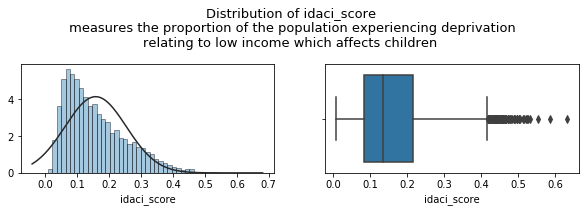

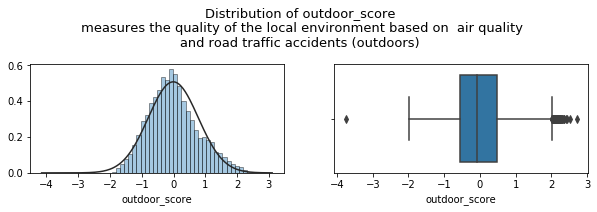

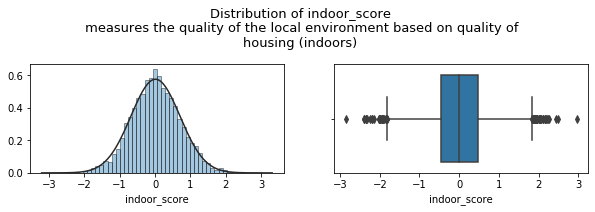

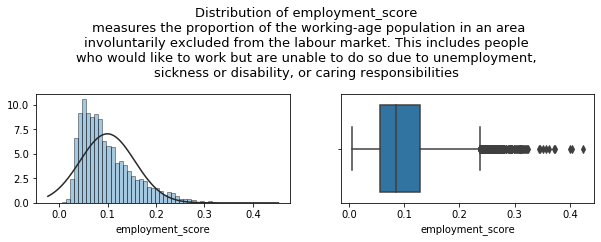

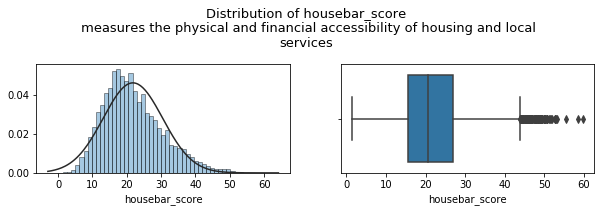

In [5]:
socio_econ_feat = random.sample(list(df.loc[:,'income_score':'outdoor_score'].columns),5)
for feat in socio_econ_feat:
    plot_hist_box(feat,width=10,length=2,fontsize=13)

#### Population & Income Features

> - Based on the table, histograms and boxplots below, all features are positively skewed.
> - Fix: A logarithmic transformation followed by a 'box-cox' transformation will be used to establish some normality. 

>1. `total_netafterhsing` was the most normally distributed
>2. `workingage_pop` distribution was the most skewed

| variable            | skewed?   |   skew |   kurtosis |     mean |
|---------------------|-----------|--------|------------|----------|
| workingage_pop      | True      |  1.528 |      4.665 |  4698.99 |
| 16_59_pop           | True      |  1.472 |      4.278 |  4669.46 |
| under16_pop         | True      |  1.264 |      3.278 |  1532.18 |
| total_pop           | True      |  0.961 |      1.441 |  8058.93 |
| total_inc           | True      |  0.92  |      1.162 | 42103.7  |
| total_netinc        | True      |  0.877 |      1.834 | 33411.6  |
| total_netb4hsing    | True      |  0.852 |      1.195 | 31034.6  |
| over60_pop          | True      |  0.692 |      0.965 |  1857.29 |
| total_netafterhsing | True      |  0.586 |      0.444 | 27371.3  |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/workingage_pop_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/total_netafterhsing_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

In [6]:
#statistic_table('total_pop','total_netafterhsing',0.5)
#markdown_table('total_pop','total_netafterhsing',0.5)

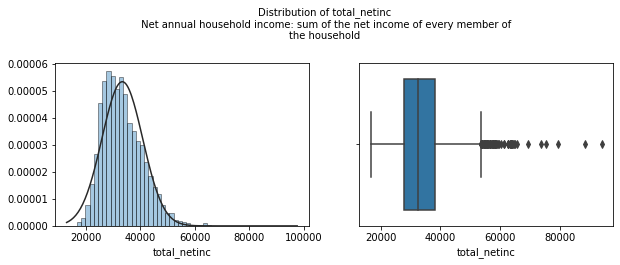

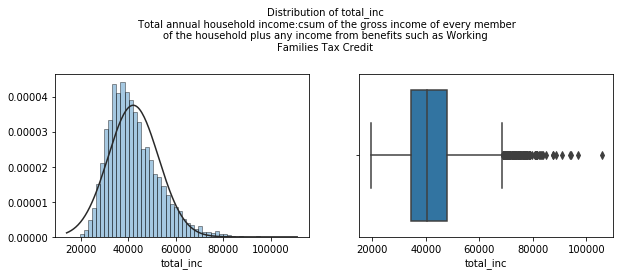

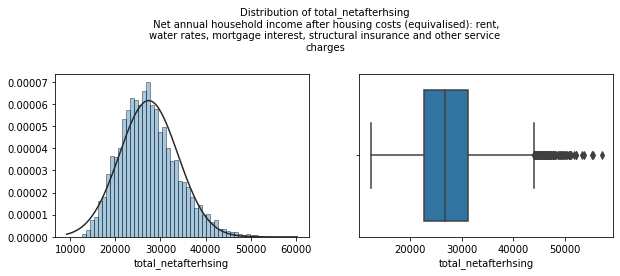

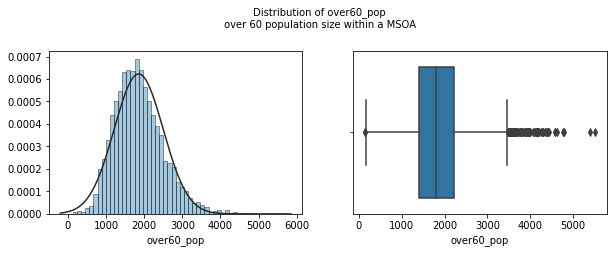

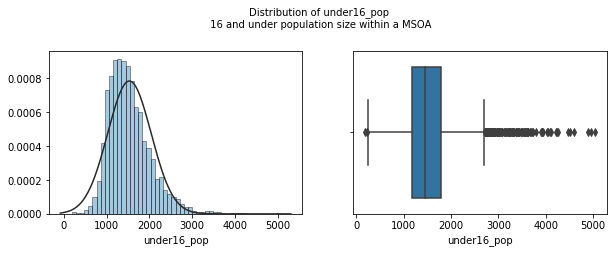

In [7]:
population = random.sample(list(df.loc[:,'total_pop':'total_netafterhsing'].columns),5)
for feat in population:
    plot_hist_box(feat)

#### Transportation Features

> Based on the table, histograms and boxplots below, all features are positively skewed with the exception of one. There were no negative values however not all were non-zero.

> Fix: In order to address zero values the features were aggregated together based on simulatrity to the mode of transportation. After aggregation a logarithmic transformation followed by a 'box-cox' power transformation was used to compress the figures and address the skewness and some outliers.

>1. `cardriver_friends` was the most normally distributed
>2. `rail_work` distribution was the most skewed

| variable                        | skewed?   |   skew |   kurtosis |     mean |
|---------------------------------|-----------|--------|------------|----------|
| rail_from_work                  | True      | 43.975 |   2534.33  |  283.477 |
| rail_to_work                    | True      | 42.506 |   2411.42  |  283.478 |
| rail_to_empbus_nhb              | True      | 40.889 |   2230.6   |   12.5   |
| walk_from_personbus_nhb         | True      | 40.501 |   2407.32  |   54.766 |
| rail_to_personbus_nhb           | True      | 39.955 |   2106.52  |    3.297 |
| ..................              | .....     |  ..... |      ....  |   ...... |
| cycle_from_friends              | True      |  1.021 |      2.94  |   29.065 |
| walk_from_friends               | True      |  0.953 |      1.462 |  350.994 |
| cardriver_to_friends            | True      |  0.807 |      1.544 |  777.414 |
| carpassenger_from_friends       | True      |  0.75  |      0.605 |  595.595 |
| cardriver_from_friends          | False     |  0.407 |      0.523 |  777.413 |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/rail_from_work_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/cardriver_from_friends_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

In [8]:
#statistic_table('walk_to_work','rail_from_holiday_nhb',0.5)
#markdown_table('walk_to_work','rail_from_holiday_nhb',0.5)

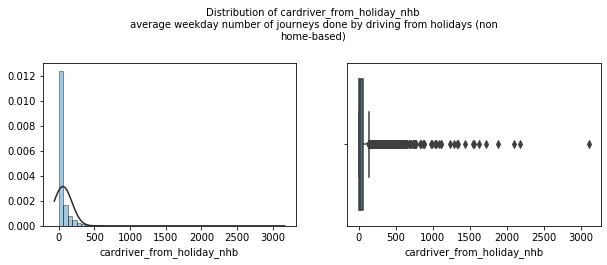

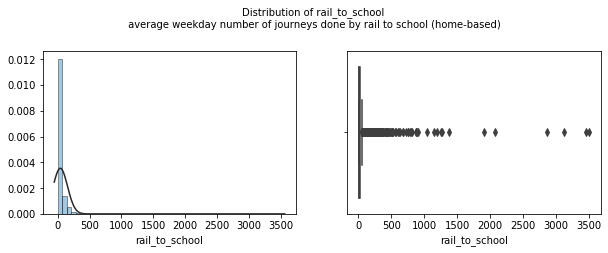

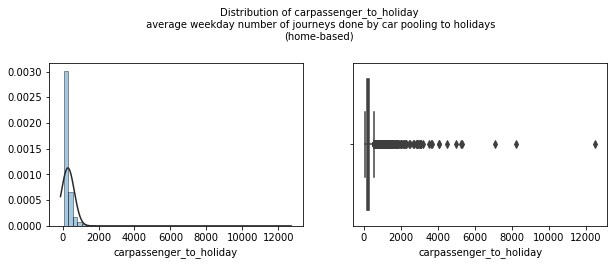

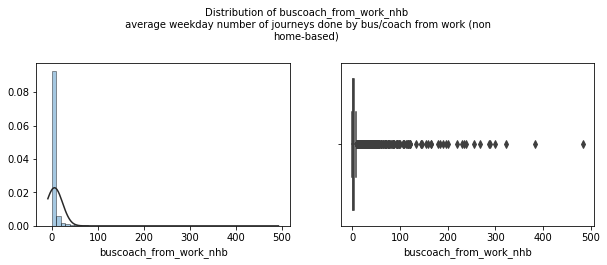

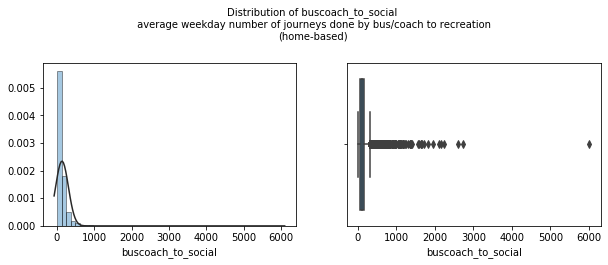

In [9]:
transport = random.sample(list(df.loc[:,'walk_to_work':'rail_from_holiday_nhb'].columns),5)
for feat in transport:
    plot_hist_box(feat)

#### Car Ownership & Registration Features

> Based on the table, histograms and boxplots below, most features are positively skewed with the exception of two. There were no negative values however not all were non-zero. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `two_car` was the most normally distributed
>2. `2011_q4` distribution was the most skewed

| variable     | skewed?   |   skew |   kurtosis |      mean |
|--------------|-----------|--------|------------|-----------|
| 2011_q4      | True      | 21.407 |    536.39  |     1.577 |
| 2012_q1      | True      | 20.501 |    504.063 |     1.595 |
| 2012_q2      | True      | 19.48  |    467.73  |     1.651 |
| 2012_q3      | True      | 18.068 |    418.449 |     1.722 |
| 2012_q4      | True      | 15.881 |    341.677 |     1.798 |
| ......       | ....      |  ..... |      ..... |   ....... |
| no_car       | True      |  1.609 |      3.286 |   840.412 |
| three_car    | True      |  0.748 |      0.36  |   300.149 |
| one_car      | True      |  0.699 |      0.622 |  1471.5   |
| total_cars   | False     |  0.403 |      0.244 |  4156.57  |
| two_car      | False     |  0.303 |      0.055 |   862.297 |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/2011_q4_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/two_car_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

In [10]:
#statistic_table('no_car','growth',0.5)
#markdown_table('no_car','growth',0.5)

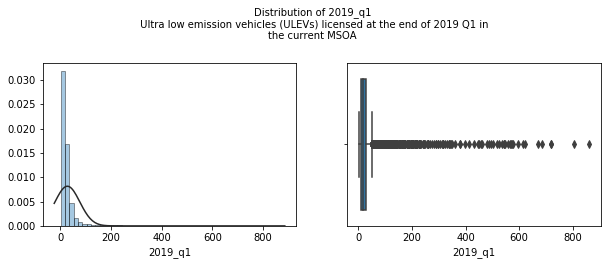

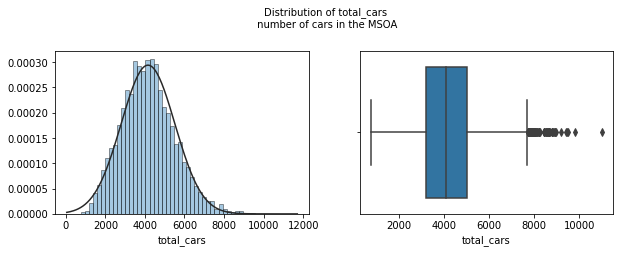

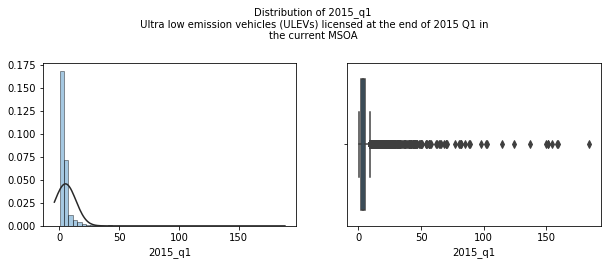

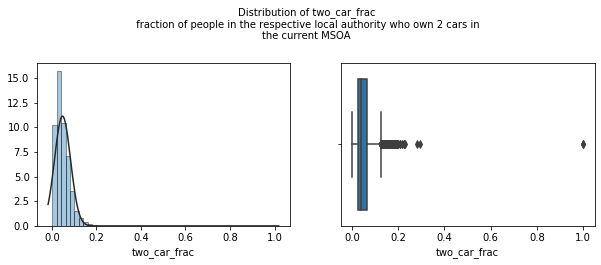

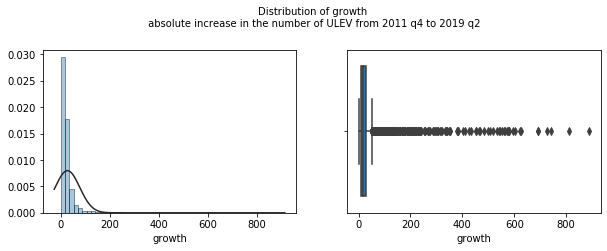

In [11]:
car_ownreg = random.sample(list(df.loc[:,'no_car':'growth'].columns),5)
for feat in car_ownreg:
    plot_hist_box(feat)

#### Geo-Spatial Features

> Based on the table, histograms and boxplots below, 100% of features appeared to be positively skewed with no negative values but with zero values. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `st_lengthshape` was the most normally distributed (number of supermarkets in a MSOA) 
>2. `num_parking` was the most skewed distribution (number of car parks in a MSOA)

| variable              | skewed?   |   skew |   kurtosis |            mean |
|-----------------------|-----------|--------|------------|-----------------|
| num_parking           | True      |  9.38  |    142.388 |     0.732       |
| train_st_distance     | True      |  8.252 |     96.424 |    74.063       |
| num_train_st          | True      |  7.58  |     88.579 |     0.986       |
| parking_distance      | True      |  7.57  |     85.748 |    82.081       |
| supermarkets_distance | True      |  7.201 |     74.56  |    88.961       |
| st_areashape          | True      |  6.871 |     88.136 |     1.92066e+07 |
| num_hotels            | True      |  6.65  |     55.03  |     2.705       |
| hotel_distance        | True      |  5.554 |     36.963 |   159.588       |
| gas_st_distance       | True      |  5.537 |     40.848 |   114.466       |
| park_distance         | True      |  5.351 |     41.31  |   122.38        |
| num_parks             | True      |  3.536 |     20.246 |     1.259       |
| num_gas_st            | True      |  3.388 |     17.805 |     1.222       |
| num_supermarkets      | True      |  3.354 |     13.417 |     0.638       |
| st_lengthshape        | True      |  2.794 |      9.577 | 21075.5         |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/num_parking_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/st_lengthshape_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

Note all these geo-spatial distributions have simular shapes to the target variable distribution

In [12]:
#statistic_table('num_parks','st_lengthshape',0.5)
#markdown_table('num_parks','st_lengthshape',0.5)

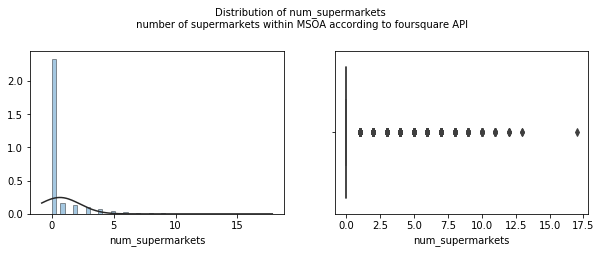

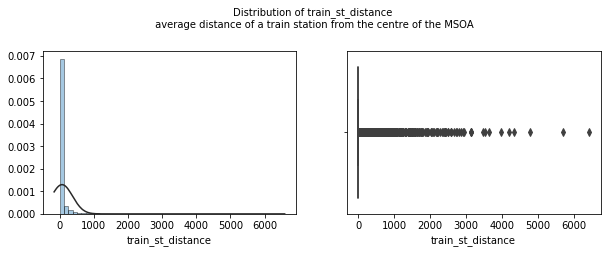

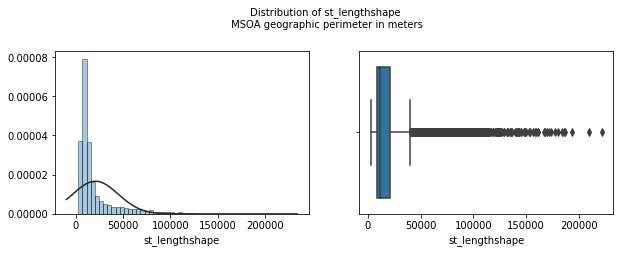

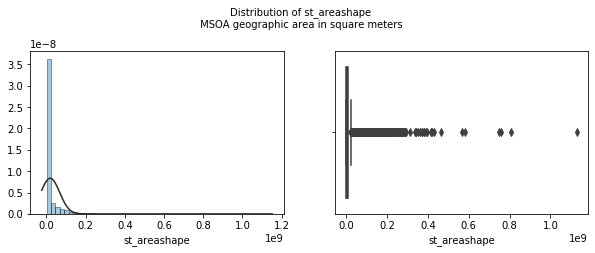

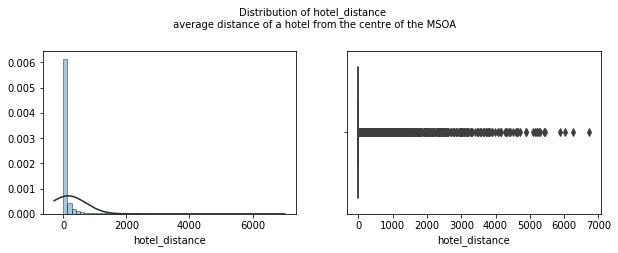

In [13]:
geo_spatial = random.sample(list(df.loc[:,'num_parks':'st_lengthshape'].columns),5)
for feat in geo_spatial:
    plot_hist_box(feat)

#### Electricity Consumption Features

> Based on the table, histograms and boxplots below, 100% of features appeared to be positively skewed with no negative values but with zero values. 

> Fix: A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

>1. `elec_nd_con_mean` was the most normally distributed (mean non-domestic electricity consumption in a MSOA) 
>2. `elec_nd_con` was the most skewed distribution (non-domestic electricity consumption in a MSOA)

| variable                | skewed?   |   skew |   kurtosis |            mean |
|-------------------------|-----------|--------|------------|-----------------|
| nd_meters               | True      | 11.2   |    259.711 |     4.19392e+06 |
| elec_nd_con             | True      |  7.276 |    134.289 |   278.728       |
| elec_nd_con_mdn         | True      |  4.787 |     85.914 | 15109.4         |
| residential_meter_ratio | True      |  3.935 |     36.591 |     0.001       |
| residential_ratio       | True      |  2.562 |     12.362 | 74011.7         |
| residential_mdn_ratio   | True      |  1.921 |     12.132 |     0.208       |
| elec_d_con_mean         | True      |  1.676 |      3.547 |  3672.73        |
| elec_d_con              | True      |  1.324 |      3.262 |     1.29723e+07 |
| elec_d_con_mdn          | True      |  1.258 |      2.884 |  2929.83        |
| d_meters                | True      |  1.215 |      3.189 |  3553.67        |
| elec_nd_con_mean        | True      |  0.563 |      1.399 |  6254.74        |

<table>
    <tr>
        <td>
            <img src="./eda_graphs/nd_meters_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
        <td>
           <img src="./eda_graphs/elec_nd_con_mean_hist_bar.jpg" style="width: 100%; margin: 2px">
        </td>
    </tr>
</table>

In [14]:
#statistic_table('elec_d_con','residential_mdn_ratio',0.5)
#markdown_table('elec_d_con','residential_mdn_ratio',0.5)

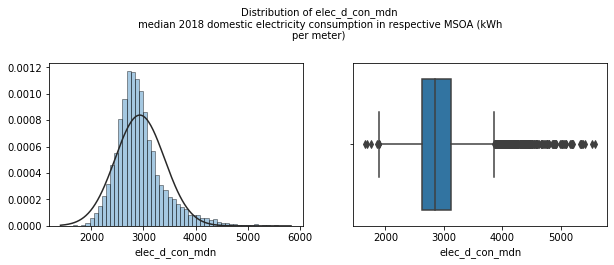

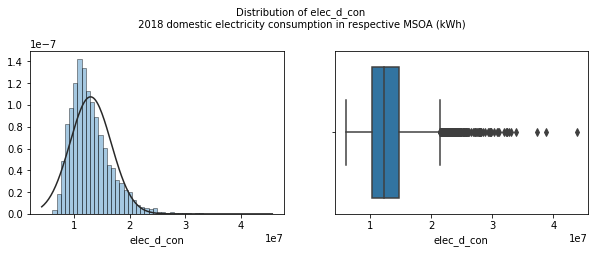

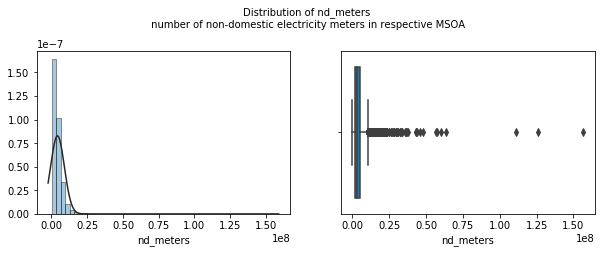

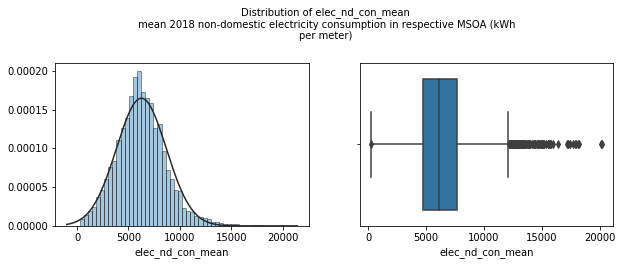

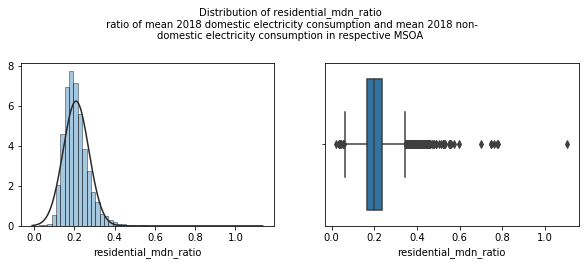

In [15]:
electricity = random.sample(list(df.loc[:,'elec_d_con':'residential_mdn_ratio'].columns),5)
for feat in electricity:
    plot_hist_box(feat)

### Predictor most similar to the target

In [16]:
# Building mean, skew and kurtosis table for evaluation of features
mean = df.mean()
mean.name = 'mean'
skew = df.skew()
skew.name = 'skew'
kurtosis = df.kurtosis()
kurtosis.name = 'kurtosis'

msk = pd.concat([mean, skew, kurtosis], axis=1)

#### Target statistics

In [17]:
# Printing target variable skewness and kurtosis
print("Charge point statistics")
print("Mean: ", mean.charge_points.round(3))
print("Skew: ", skew.charge_points.round(3))
print("Kurtosis: ", kurtosis.charge_points.round(3))

Charge point statistics
Mean:  2.884
Skew:  12.467
Kurtosis:  308.729


#### Which feature has a distribution most like the target variable?

In [18]:
# Setting up search margins above and below the target variable statistics
margin_skew = 0.5
margin_kurt = 2

like_target_skew = skew[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
                        (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)]

like_target_kurt = kurtosis[(skew <= skew.charge_points+margin_skew) & (skew >= skew.charge_points-margin_skew) &
                            (kurtosis <= kurtosis.charge_points+margin_kurt) & (kurtosis >= kurtosis.charge_points-margin_kurt)]

skew_varname = like_target_skew[0:1].index[0]
skew_value = like_target_skew[0:1][0].round(3)

kurt_varname = like_target_kurt[0:1].index[0]
kurt_value = like_target_kurt[0:1][0].round(3)

print(
    f"The {skew_varname} variable which is {EV_britain().description[skew_varname]} has similar skew and kurtosis")
print("Skew: ", skew_value)
print("Kurtosis: ", kurt_value)

The cycle_from_work_nhb variable which is average weekday number of journeys done by cycling from work (non home-based) has similar skew and kurtosis
Skew:  11.968
Kurtosis:  310.61


Text(0.5, 0, 'Number of EV charge points')

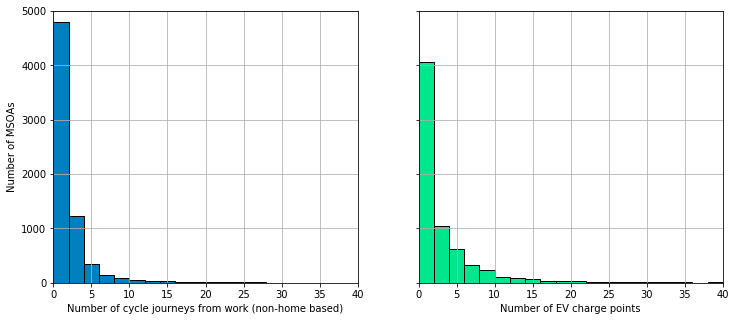

In [19]:
# Plotting feature most similar to target
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
df.cycle_from_work_nhb.hist(bins=np.linspace(
    0, 40, 21), ec='k', color=cm.winter(0.5), ax=ax[0])
df.charge_points.hist(bins=np.linspace(0, 40, 21), ec='k',
                      color=cm.winter(0.9), ax=ax[1])

# Cycle from work feature variable
ax[0].set_ylabel("Number of MSOAs")
ax[0].set_xlabel("Number of cycle journeys from work (non-home based)")
ax[0].set_xlim(0, 40)
ax[0].set_ylim(0, 5000)

# Charge points target variable
ax[1].set_xlim(0, 40)
ax[1].set_ylim(0, 5000)
ax[1].set_xlabel("Number of EV charge points")

### Transformation of heavily skewed features

In [20]:
# Creating histogram plotting function for original individual feature

def plot_original_hist(variable, df):

    the_variable = df[variable]
    skew = the_variable.skew()
    kurtosis = the_variable.kurtosis()
    the_mean = the_variable.mean()
    the_median = the_variable.median()
    the_std = the_variable.std()
    print(f"{the_variable.name}", end="----> ")
    print(f"Mean: {the_mean:.3f} ", end="----> ")
    print(f"Median: {the_median:.3f} ", end="----> ")
    print(f"StdDev: {the_std:.3f} ", end="----> ")
    print(f"Skew: {skew:.3f} ", end="----> ")
    print(f"Kurtosis:{kurtosis:.3f}")

    fig, ax = plt.subplots(figsize=(5, 5))
    the_variable.hist(bins=30, color=cm.winter(0.7), ec='k', ax=ax)
    ax.set_xlabel(f"{variable}", fontsize=20)
    ax.set_ylabel("frequency", fontsize=20)
    ax.grid(False)
    plt.savefig("../reports/figures/histograms/"+variable+"_hist_original.jpg", dpi=800, transparent=False,
                edgecolor='k', facecolor='w', pad_inches=0.1, bbox_inches='tight')
    return display()


def plot_transformed_hist(variable, df):

    the_variable = df[variable]
    skew = the_variable.skew()
    kurtosis = the_variable.kurtosis()
    the_mean = the_variable.mean()
    the_median = the_variable.median()
    the_std = the_variable.std()
    print(f"{the_variable.name}", end="----> ")
    print(f"Mean: {the_mean:.3f} ", end="----> ")
    print(f"Median: {the_median:.3f} ", end="----> ")
    print(f"StdDev: {the_std:.3f} ", end="----> ")
    print(f"Skew: {skew:.3f} ", end="----> ")
    print(f"Kurtosis:{kurtosis:.3f}")

    fig, ax = plt.subplots(figsize=(5, 5))
    the_variable.hist(bins=30, color=cm.winter(0.7), ec='k', ax=ax)
    ax.set_xlabel(f"{variable}", fontsize=20)
    ax.set_ylabel("frequency", fontsize=20)
    ax.grid(False)
    plt.savefig("../reports/figures/histograms/"+variable+"_hist_transform.jpg", dpi=800, transparent=False,
                edgecolor='k', facecolor='w', pad_inches=0.1, bbox_inches='tight')
    return display()

In [36]:
# Writing a function to display transformed features in a dataframe(Box Plot + Interactive Histogram)


def get_features(start, end, power=False, log=False, stand=False, aggreg=False, remove=[]):

    features = df.loc[:, start:end]
    features = features.drop(remove, axis=1)
    features_col = features.columns

    if aggreg == True:
        features = TransportAggregate().fit_transform(features)
        features_col = features.columns

    if log == True:
        features = features.apply(lambda x: np.log1p(x))
        features = pd.DataFrame(features, columns=features_col)

    if power == True and np.any(features <= 0) == True:

        features = PowerTransformer('yeo-johnson').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    elif power == True and np.any(features <= 0) == False:
        # print(PowerTransformer('box-cox').fit(features).lambdas_)
        features = PowerTransformer('box-cox').fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    if stand == 1:
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)
    elif stand == 2:
        features = MinMaxScaler().fit_transform(features)
        features = pd.DataFrame(features, columns=features_col)

    else:
        stand == 0
        pass

    return features

# Writing a function to plot transformed features in a Box Plot


def transform_and_plot(start, end, power=False, log=False, stand=False, aggreg=False, remove=[], ax=ax):

    features = get_features(start, end, power, log, stand, aggreg, remove)
    sns.set_style(style='white')

    # plt.savefig("../reports/figures/boxplots/"+file)

    return sns.boxplot(data=features, orient='h', notch=False, ax=ax,palette='winter')

In [ ]:
#interact(plot_transformed_hist, variable=features_col,df=fixed(features))

#### Socio-Economic Features

> - 8 out of the 15 socio-economic features were positively skewed. A 'box-cox' transformation was used for these variables to establish some normality. The remaining 7 variables were simply standardised with no transformation necessary as they had relatively normal distributions

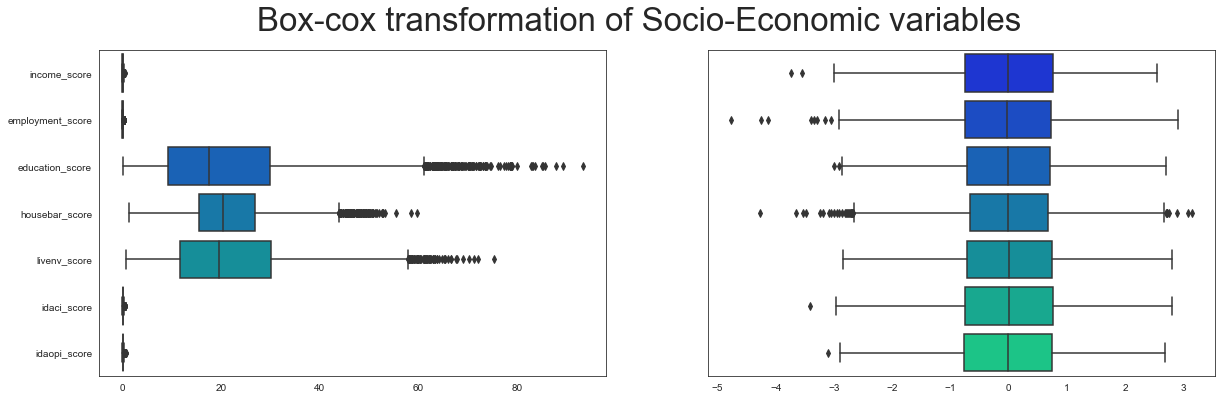

In [37]:
soc_econ1 = get_features('income_score', 'adultskills_score', power=1, log=0, stand=0, remove=[
                         'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'])

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot('income_score', 'adultskills_score', power=0, log=0, stand=0, remove=[
    'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'], ax=ax[0])
transform_and_plot('income_score', 'adultskills_score', power=1, log=0, stand=0, remove=[
    'health_score', 'crime_score', 'chanyp_score', 'adultskills_score'], ax=ax[1])

plt.suptitle("Box-cox transformation of Socio-Economic variables",fontsize=33)
plt.savefig("./eda_graphs/socio_econ1_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

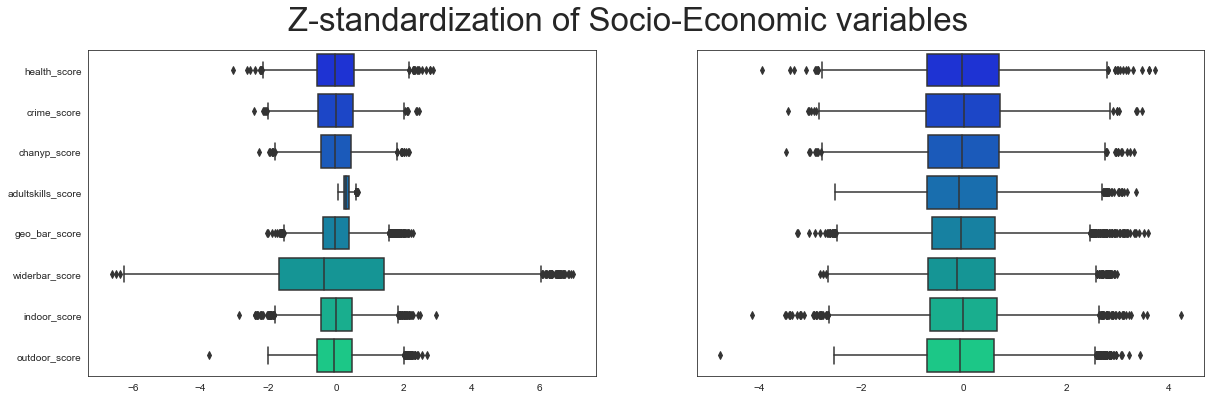

In [38]:
soc_econ2 = get_features('health_score', 'outdoor_score', power=0, log=0, stand=0, remove=[
                         'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'])

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot('health_score', 'outdoor_score', power=0, log=0, stand=0, remove=[
    'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'], ax=ax[0])
transform_and_plot('health_score', 'outdoor_score', power=0, log=0, stand=1, remove=[
    'housebar_score', 'livenv_score', 'idaci_score', 'idaopi_score'], ax=ax[1])

plt.suptitle("Z-standardization of Socio-Economic variables",fontsize=33)
plt.savefig("./eda_graphs/socio_econ2_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Population & Income Features

> A logarithmic transformation was performed to compress primarily the income features. This was followed by a 'box-cox' power transformation to address the skewness and some outliers.

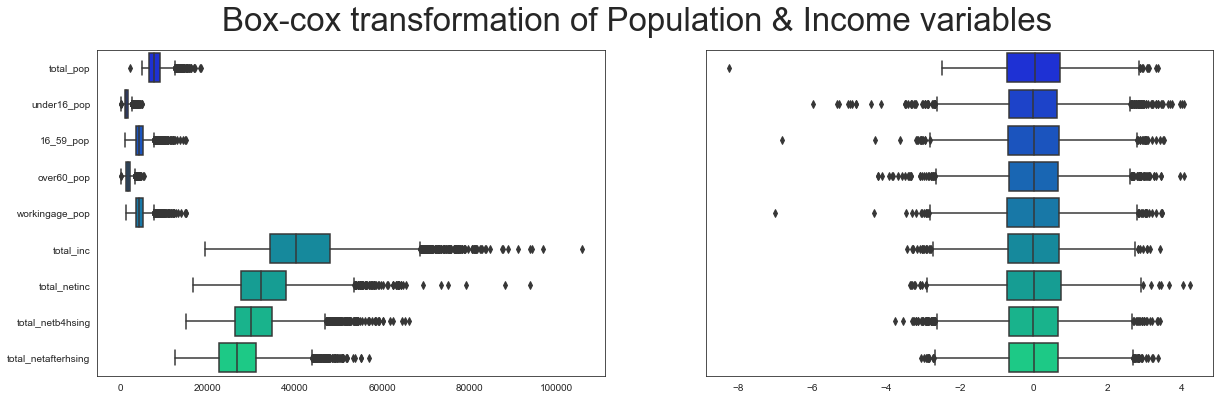

In [39]:
population = get_features('total_pop', 'total_netafterhsing', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
transform_and_plot('total_pop', 'total_netafterhsing',
                   power=0, log=0, ax=ax[0])
transform_and_plot('total_pop', 'total_netafterhsing',
                   power=1, log=1, ax=ax[1])

plt.suptitle("Box-cox transformation of Population & Income variables",fontsize=33)
plt.savefig("./eda_graphs/pop_income_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Transportation Features

> In order to address zero values the features were aggregated together based on simulatrity to the mode of transportation. After aggregation a logarithmic transformation followed by a 'box-cox' power transformation was used to compress the figures and address the skewness and some outliers.

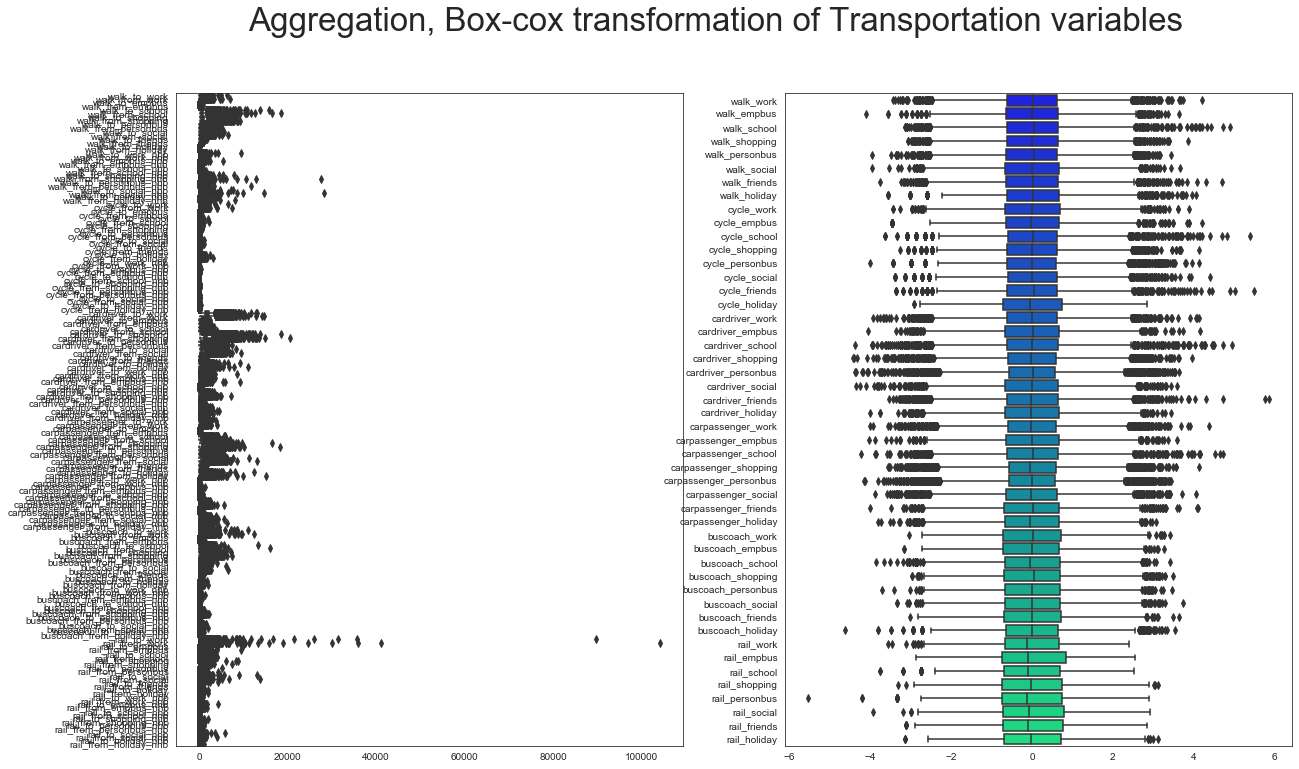

In [40]:
transport = get_features(
    'walk_to_work', 'rail_from_holiday_nhb', power=1, log=1, aggreg=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=False)
transform_and_plot('walk_to_work', 'rail_from_holiday_nhb',
                   power=0, log=0, aggreg=0, ax=ax[0])
transform_and_plot('walk_to_work', 'rail_from_holiday_nhb',
                   power=1, log=1, aggreg=1, ax=ax[1])

plt.suptitle("Aggregation, Box-cox transformation of Transportation variables",fontsize=33)
plt.savefig("./eda_graphs/transport_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Car Ownership & Registration Features

>A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

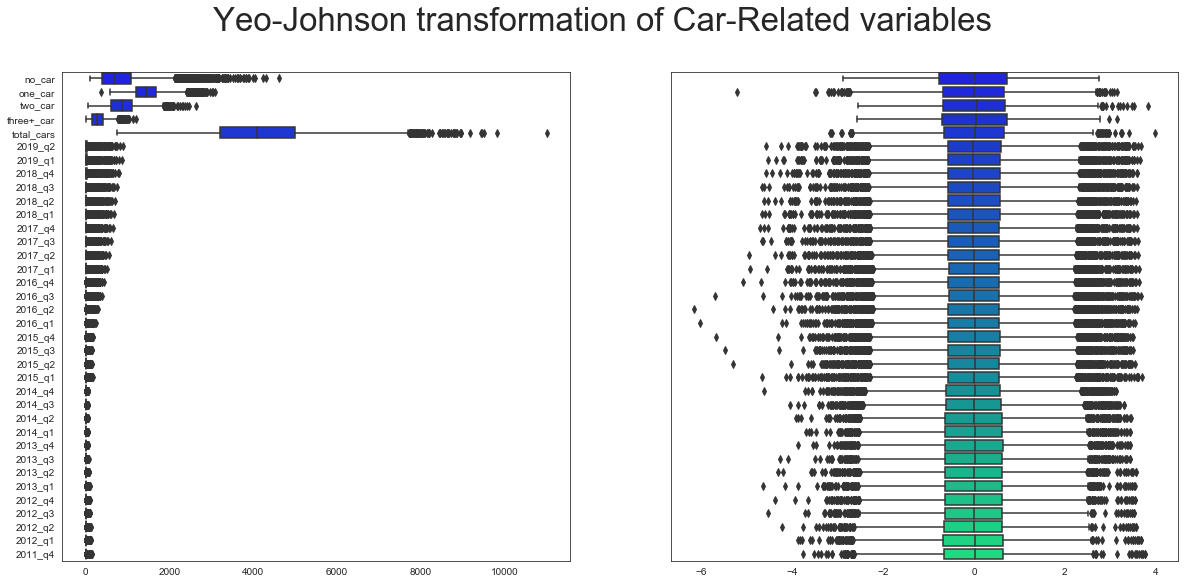

In [41]:
car_ownreg = get_features('no_car', 'growth',
                          log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'])

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot('no_car', 'growth',
                   log=0, power=0, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'], ax=ax[0])
transform_and_plot('no_car', 'growth',
                   log=1, power=1, stand=0, remove=['two_car_tot', 'growth', 'two_car_frac'], ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Car-Related variables",fontsize=33)
plt.savefig("./eda_graphs/car_ownreg_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Geo-Spatial Features

> A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

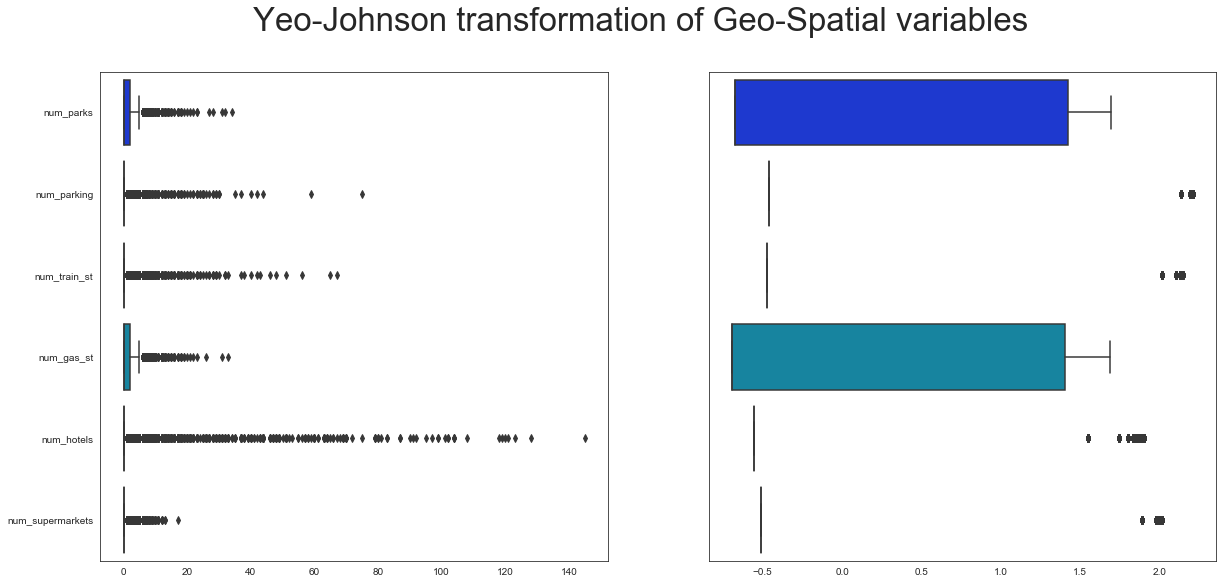

In [42]:
geo_spatial = get_features('num_parks', 'st_lengthshape', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot('num_parks', 'num_supermarkets', power=0, log=0, ax=ax[0])
transform_and_plot('num_parks', 'num_supermarkets', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("./eda_graphs/geo_spatial1_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

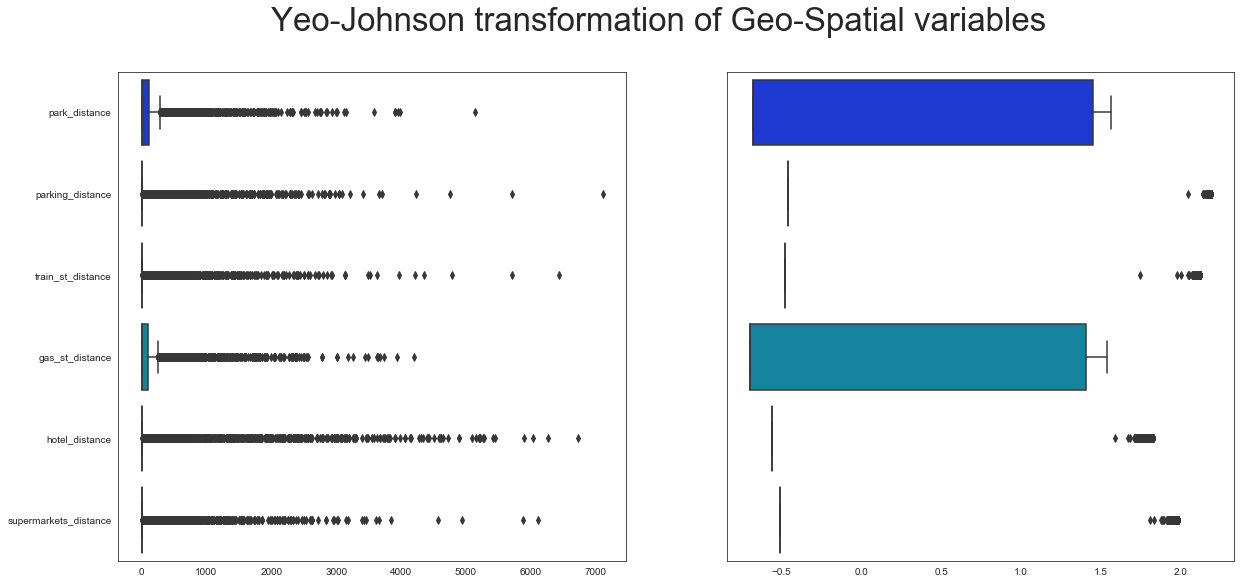

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot('park_distance', 'supermarkets_distance', power=0, log=0, ax=ax[0])
transform_and_plot('park_distance', 'supermarkets_distance', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("./eda_graphs/geo_spatial2_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

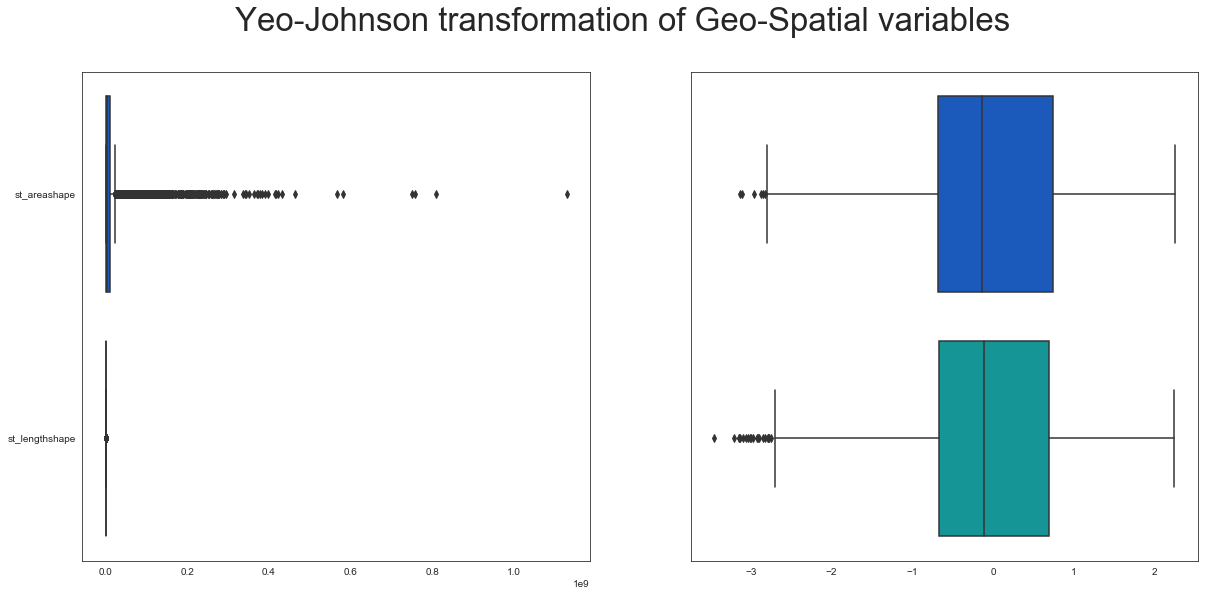

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot('st_areashape', 'st_lengthshape', power=0, log=0, ax=ax[0])
transform_and_plot('st_areashape', 'st_lengthshape', power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Geo-Spatial variables",fontsize=33)
plt.savefig("./eda_graphs/geo_spatial3_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

#### Electricity Consumption Features

> A logarithmic transformation followed by a 'yeo-johnson' power transformation was used to address the skewness and some outliers.

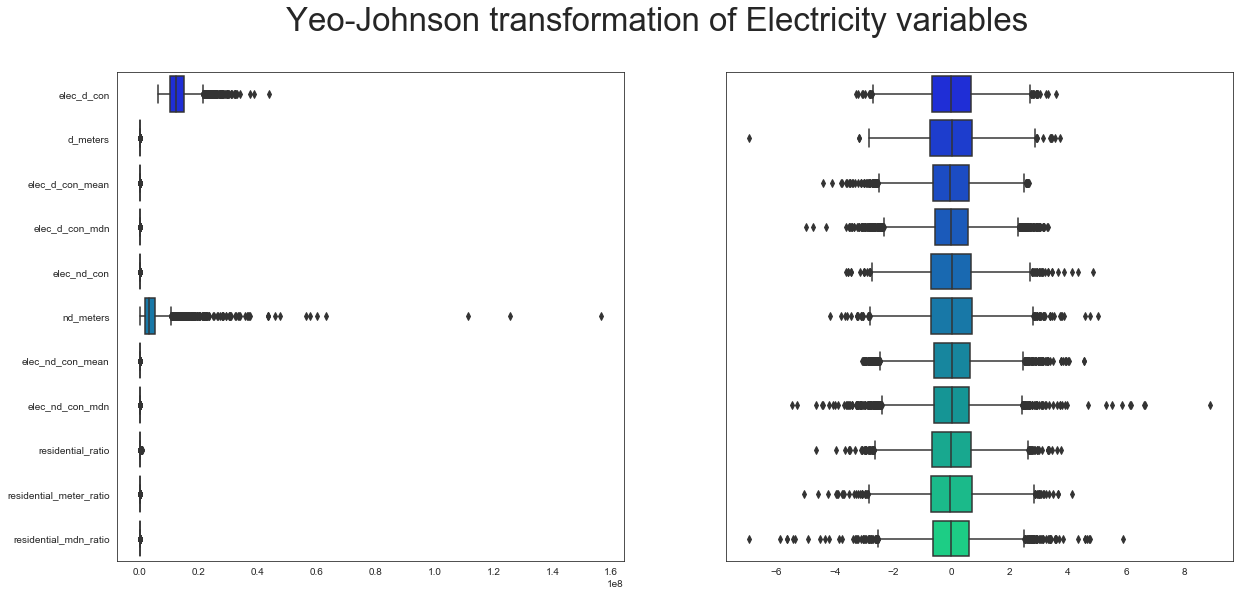

In [45]:
electricity = get_features(
    'elec_d_con', 'residential_mdn_ratio', power=1, log=1)

fig, ax = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
transform_and_plot('elec_d_con', 'residential_mdn_ratio',
                   power=0, log=0, ax=ax[0])
transform_and_plot('elec_d_con', 'residential_mdn_ratio',
                   power=1, log=1, ax=ax[1])

plt.suptitle("Yeo-Johnson transformation of Electricity variables",fontsize=33)
plt.savefig("./eda_graphs/electricity_transform.jpg",format='jpg',dpi=144,bbox_inches='tight',quality=100);

In [46]:
#Creating both cubic transformation and logarithmic transformation of target variable
df['charge_pt_cbrt'] = np.cbrt(df.charge_points)
df['charge_pt_log'] = np.log1p(df.charge_points)

metropol = df.loc[:, 'metropolitan':]

#Creating fully transformed dataframe including the target variable
trans_df = pd.concat([soc_econ1, soc_econ2, population,transport,car_ownreg,geo_spatial,electricity,metropol], axis=1)

trans_df.head()

,income_score,employment_score,education_score,housebar_score,livenv_score,idaci_score,idaopi_score,health_score,crime_score,chanyp_score,...,nd_meters,elec_nd_con_mean,elec_nd_con_mdn,residential_ratio,residential_meter_ratio,residential_mdn_ratio,metropolitan,charge_points,charge_pt_cbrt,charge_pt_log
0,0.088871,-0.328150,-0.807968,0.445443,1.824076,0.866820,1.465212,0.3630,0.80880,-0.04220,...,0.197921,-2.841671,-2.338393,-1.257011,0.162572,1.235550,1,1.0,1.0,0.693147
1,0.900348,0.866787,0.959446,0.586226,-0.709900,0.582644,0.953194,0.7670,0.68000,0.51950,...,-0.143319,-0.200073,-0.517636,-0.544830,-0.100296,0.118798,0,0.0,0.0,0.000000
2,-0.007405,0.211704,0.189744,0.007621,1.260961,0.207690,-0.513265,-0.0575,0.65925,-0.19225,...,-0.332959,1.274794,1.292622,0.339985,0.095846,-1.692076,1,0.0,0.0,0.000000
3,1.040667,1.380963,1.693272,0.186107,-1.075471,1.107423,0.396439,0.7454,0.17780,1.23600,...,-0.535777,2.636012,1.338312,1.087951,0.655943,-1.574221,0,0.0,0.0,0.000000
4,1.685602,1.808018,1.254968,-1.863149,0.323616,1.718330,1.433688,1.7044,-0.06740,0.81980,...,-1.263597,-0.004359,0.586896,1.333457,1.292716,-1.029627,1,0.0,0.0,0.000000


In [ ]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']
activities = ['work', 'empbus', 'school', 'shopping',
              'personbus', 'social', 'friends', 'holiday']
direction = ['to', 'from']

### Correlation of Features with Target variable

In [ ]:
#Writing function to 
def search_corr(variable_list, target_list, figsize, num):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(round(matrix, 2), mask=mask, annot=True, cmap='winter',vmin=-1,vmax=1,linewidths=0.1)
    plt.ylim(num, 0)

    result = matrix[target_list]
    sort_list = result.charge_points.apply(
        lambda x: abs(x)).sort_values(ascending=False)[3:5].index
    print(matrix[target_list].loc[sort_list, :])
    return list(sort_list)


def just_plot(variable_list, target_list, figsize, num, filename):
    list1 = variable_list
    list2 = target_list
    matrix = pd.concat(
        [trans_df.loc[:, list1], trans_df.loc[:, list2]], axis=1).corr()
    mask = np.zeros_like(matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=figsize)
    sns.heatmap(round(matrix, 2), mask=mask, annot=True, cmap='winter')
    plt.ylim(num, 0)
    plt.savefig("../reports/figures/"+filename)

In [ ]:
feat_list = []

#### SocioEconomic Feature correlations

There was a low correlation of socio-economic features with the number of EV charge points in a MSOA

> 1. The **top 2** correlated features were `workingage_pop` and `16_59_pop`

> 2. There was high intercorrelation between the `workingage_pop` and `16_59_pop` as expected as the working age population tends to be between the age of 16 - 59.

In [ ]:
soc_econ_list = trans_df.loc[:, 'income_score':'total_netafterhsing'].columns

targets_list = ['charge_points', 'charge_pt_cbrt', 'charge_pt_log']

feat_list.extend(search_corr(soc_econ_list, targets_list, (17, 15), 27))

#### Transportation Feature correlations
There was a mildly low correlation of transportation features with the number of EV charge points in a MSOA

The **top 2** correlated features for each mode of transport were as follows:<br>
> 1. **walking to/from a social event or to/from conduct employers business:**<br>
`walk_empbus` and `walk_social`<br><br>
> - **cycling to/from a social event or to/from conduct employers business:**<br>
`cycle_empbus` and `cycle_social`<br><br>
> - **driving alone to/from work or to conduct employers business:**<br>
`cardriver_empbus` and `cardriver_work` <br><br>
> - **driving with passengers to/from work or to conduct employers business:**<br>
`carpassenger_empbus` and `carpassenger_work` <br><br>
> - **taking the bus to/from a social event or to/from conduct employers business:**<br>
`buscoach_empbus` and `buscoach_social`<br><br>
> - **taking the train to/from a social event or to/from conduct employers business:**<br>
`rail_empbus` and `rail_social`<br><br>

**EV chargepoint locations overall tend to be located in places where there is large amount of journeys for social events, work and conducting employers business**

In [ ]:
mode = ['walk', 'cycle', 'cardriver', 'carpassenger', 'buscoach', 'rail']

for num, x in enumerate(mode):
    transp_list = trans_df.loc[:, f'{x}_work':f'{x}_holiday'].columns
    feat_list.extend(search_corr(transp_list, targets_list, (9, 7), 11))

#### Car Ownership Feature correlations

There was a low correlation of car ownership features with the number of EV charge points in a MSOA

The **top 2** correlated features for car ownership were as follows:<br>

> 1. **no car ownership and owners of 3+ cars:**<br>
`no_car` and `three+_car` <br>
> 2. There was high intercorrelation between the time related variables.

In [ ]:
sns.set(font_scale=0.75)
cars_list = trans_df.loc[:, 'no_car':'2011_q4'].columns
feat_list.extend(search_corr(cars_list, targets_list, (15, 12), 40))

In [ ]:
sns.lmplot('idaopi_score', 'no_car', data=trans_df, order=1)
plt.xscale('linear')

In [ ]:
sns.lmplot('nd_meters', 'carpassenger_empbus', data=trans_df, order=1)
plt.xscale('linear')

In [ ]:
sns.set(font_scale=0.5)
sns.clustermap(trans_df.corr(),figsize=(30,30),annot=True,fmt='g')
plt.savefig("heat_map.jpg",dpi=72);

In [ ]:
sns.lmplot('st_areashape', 'metropolitan', data=trans_df, order=1)
plt.xscale('linear')

#### Geo-Spatial Feature correlations
There was a low correlation of geo-spatial features with the number of EV charge points in a MSOA

The **top 2** correlated features for geo-spatial features were as follows:<br>

> 1. **Number of train stations and their respective distance from the centre of the MSOA**<br>
`num_train_st` and `train_st_distance` <br>

In [ ]:
geo_list = trans_df.loc[:, 'num_parks':'st_lengthshape'].columns
feat_list.extend(search_corr(geo_list, targets_list, (10, 8), 17))

#### Electricity Consumption Feature correlations
There was a low correlation of electricity consumption features with the number of EV charge points in a MSOA

The **top 2** correlated features for electricity consumption were as follows:<br>

> 1. **Non-domestic electiricty consumption rates and the number of domestic and non-domestic electricity meters**<br>
`elec_nd_con` and`nd_meters`<br>
> 2. There was high intercorrelation between the `elec_nd_con` and `nd_meters` as expected due to high non domestic electricity consumption when there are high numbers of meters

In [ ]:
electricity_list = trans_df.loc[:, 'elec_d_con':'metropolitan'].columns
feat_list.extend(search_corr(electricity_list, targets_list, (8, 6), 15))

In [ ]:
just_plot(feat_list, targets_list, (18, 15), 23, "EVcorrheatmap.jpg")

In [ ]:
trans_df.drop(['charge_pt_log', 'charge_pt_cbrt',
               'charge_points'], axis=1).shape

In [ ]:
trans_df

In [ ]:
#Preparing features for a PCA analysis
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
X.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_df = pca.fit(X)

In [ ]:
#Plotting the scree plot
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.set(font='sans-serif', font_scale=1.3,style='darkgrid')
sns.lineplot(data=pca_df.explained_variance_ratio_,ax=ax[0])
ax[0].set_xlabel("Number of components")
ax[0].set_ylabel("% of variance explained")

sns.lineplot(data=pca_df.explained_variance_ratio_.cumsum(),ax=ax[1])
ax[1].set_xlabel("Number of components")
ax[1].set_ylabel("% of variance explained");

In [ ]:
#Note that 60 components explain almost all the variance in the data
# Comfirming the reduction of the components collinearity

In [ ]:
comp_num = 60
pca = PCA(comp_num)
pca_df = pd.DataFrame(pca.fit_transform(X),columns=["PC_"+str(x) for x in range(1,comp_num+1)])
sns.heatmap(pca_df.corr());

In [ ]:
y = pd.Series(y).map(lambda x : 1 if x>0 else 0)

In [ ]:
pca_df

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(solver='liblinear')
y = pd.Series(y).map(lambda x : 1 if x>0 else 0)
model.fit(pca_df, y)

model.score(pca_df, y)
# pd.DataFrame(model.coef_, index=pca_df.columns, columns=['coef']).apply(
#     lambda x: abs(x)).sort_values(by='coef', ascending=False).head(60)

In [ ]:
y.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
y = trans_df.charge_pt_log.values
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
pd.DataFrame(model.coef_, index=X.columns, columns=['coef']).apply(
    lambda x: abs(x)).sort_values(by='coef', ascending=False).head(40)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

np.sqrt(mean_squared_error(y,model.predict(X)))


In [ ]:
plt.plot(model.predict(X),y,'o')
plt.plot([0,5],[0,5])
plt.ylim(0,5)
plt.xlim(0,5);

In [ ]:
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}

In [ ]:
pd.set_option('display.max_columns', 5000)
trans_df = trans_df.dropna()
X = trans_df.drop(['charge_pt_log', 'charge_pt_cbrt', 'charge_points'], axis=1)
X = trans_df[['indoor_score','adultskills_score','cardriver_empbus','cycle_social','buscoach_empbus','num_parking','elec_nd_con','walk_empbus','residential_ratio','nd_meters']]#,buscoach_empbus','walk_work']]
#X = trans_df[['rail_shopping']]
y = trans_df.charge_points.apply(lambda x: 1 if x > 0 else 0).values
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
print(model.score(X, y))
coef_table = pd.DataFrame(model.coef_[0], index=X.columns, columns=['coef'])
coef_table['abs_coef'] = coef_table.coef.apply(lambda x: abs(x))
coef_table.sort_values(by='abs_coef', ascending=False).head(40)

In [ ]:
new_columns = []
old_columns = []
for x in range(0, 180, 2):
    two_variables = df.iloc[:, x+28:x+30].columns
    old_columns.extend(two_variables)

    mode = two_variables[0].split("_")[0]
    if two_variables[0].split("_")[-1] == 'nhb':
        activity = "_".join([two_variables[0].split(
            "_")[-2], two_variables[0].split("_")[-1]])
    else:
        activity = two_variables[0].split("_")[-1]
    new_columns.append(f'{mode}_{activity}')
    # print(df.iloc[:,x+28:x+30].columns[0].split("_")[-1])
    df[f'{mode}_{activity}'] = df.iloc[:, x+28:x+30].sum(axis=1)

#old_columns = []
for x in range(-90, 0):
    first = df.iloc[:, x].name
    second = df.iloc[:, x+8].name
    if first.split("_")[0] == second.split("_")[0]:
        df[first] = df[first]+df[second]
        old_columns.append(second)
        # print(first,second)

df = df.drop(old_columns, axis=1)
df.iloc[:, -48:]
#df[f'transport{x}'] = df.iloc[:,28:30].sum(axis=1)